#### [DataSet Download Link](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\akash\appdata\local\programs\python\python37\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def load_data(data_path, target_size=(128,128)):
    image_to_arr = []
    filelist_img = glob.glob(data_path+"*.png")
    image_paths = sorted(filelist_img)
    
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=target_size)
            image_to_arr.append(image)
        except (RuntimeError , TypeError ,NameError) as e:
            print(e)
            pass
        
    return np.asarray(image_to_arr)

In [3]:
infected = load_data('C:/Users/akash/Desktop/maleria/cell-images-for-detecting-malaria/cell_images/Parasitized/')

In [4]:
Uninfected = load_data('C:/Users/akash/Desktop/maleria/cell-images-for-detecting-malaria/cell_images/Uninfected/')

In [5]:
# Creating Dataset. Stacking the infected and uninfected
dataset = np.vstack((Uninfected, infected))

In [6]:
infected_label = np.zeros(infected.shape[0])      # giving 0 to infected and 1 to Uninfected
print(infected_label.shape)                       # printing shape
Uninfected_label = np.ones(Uninfected.shape[0])
print(Uninfected_label.shape)

(13779,)
(13779,)


In [7]:
labels = np.zeros(infected.shape[0]*2)       # Combining Labels
labels[:infected.shape[0]] = infected_label  
labels[infected.shape[0]:] = Uninfected_label

In [8]:
labels.shape

(27558,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset,labels,test_size=0.1,random_state=42)

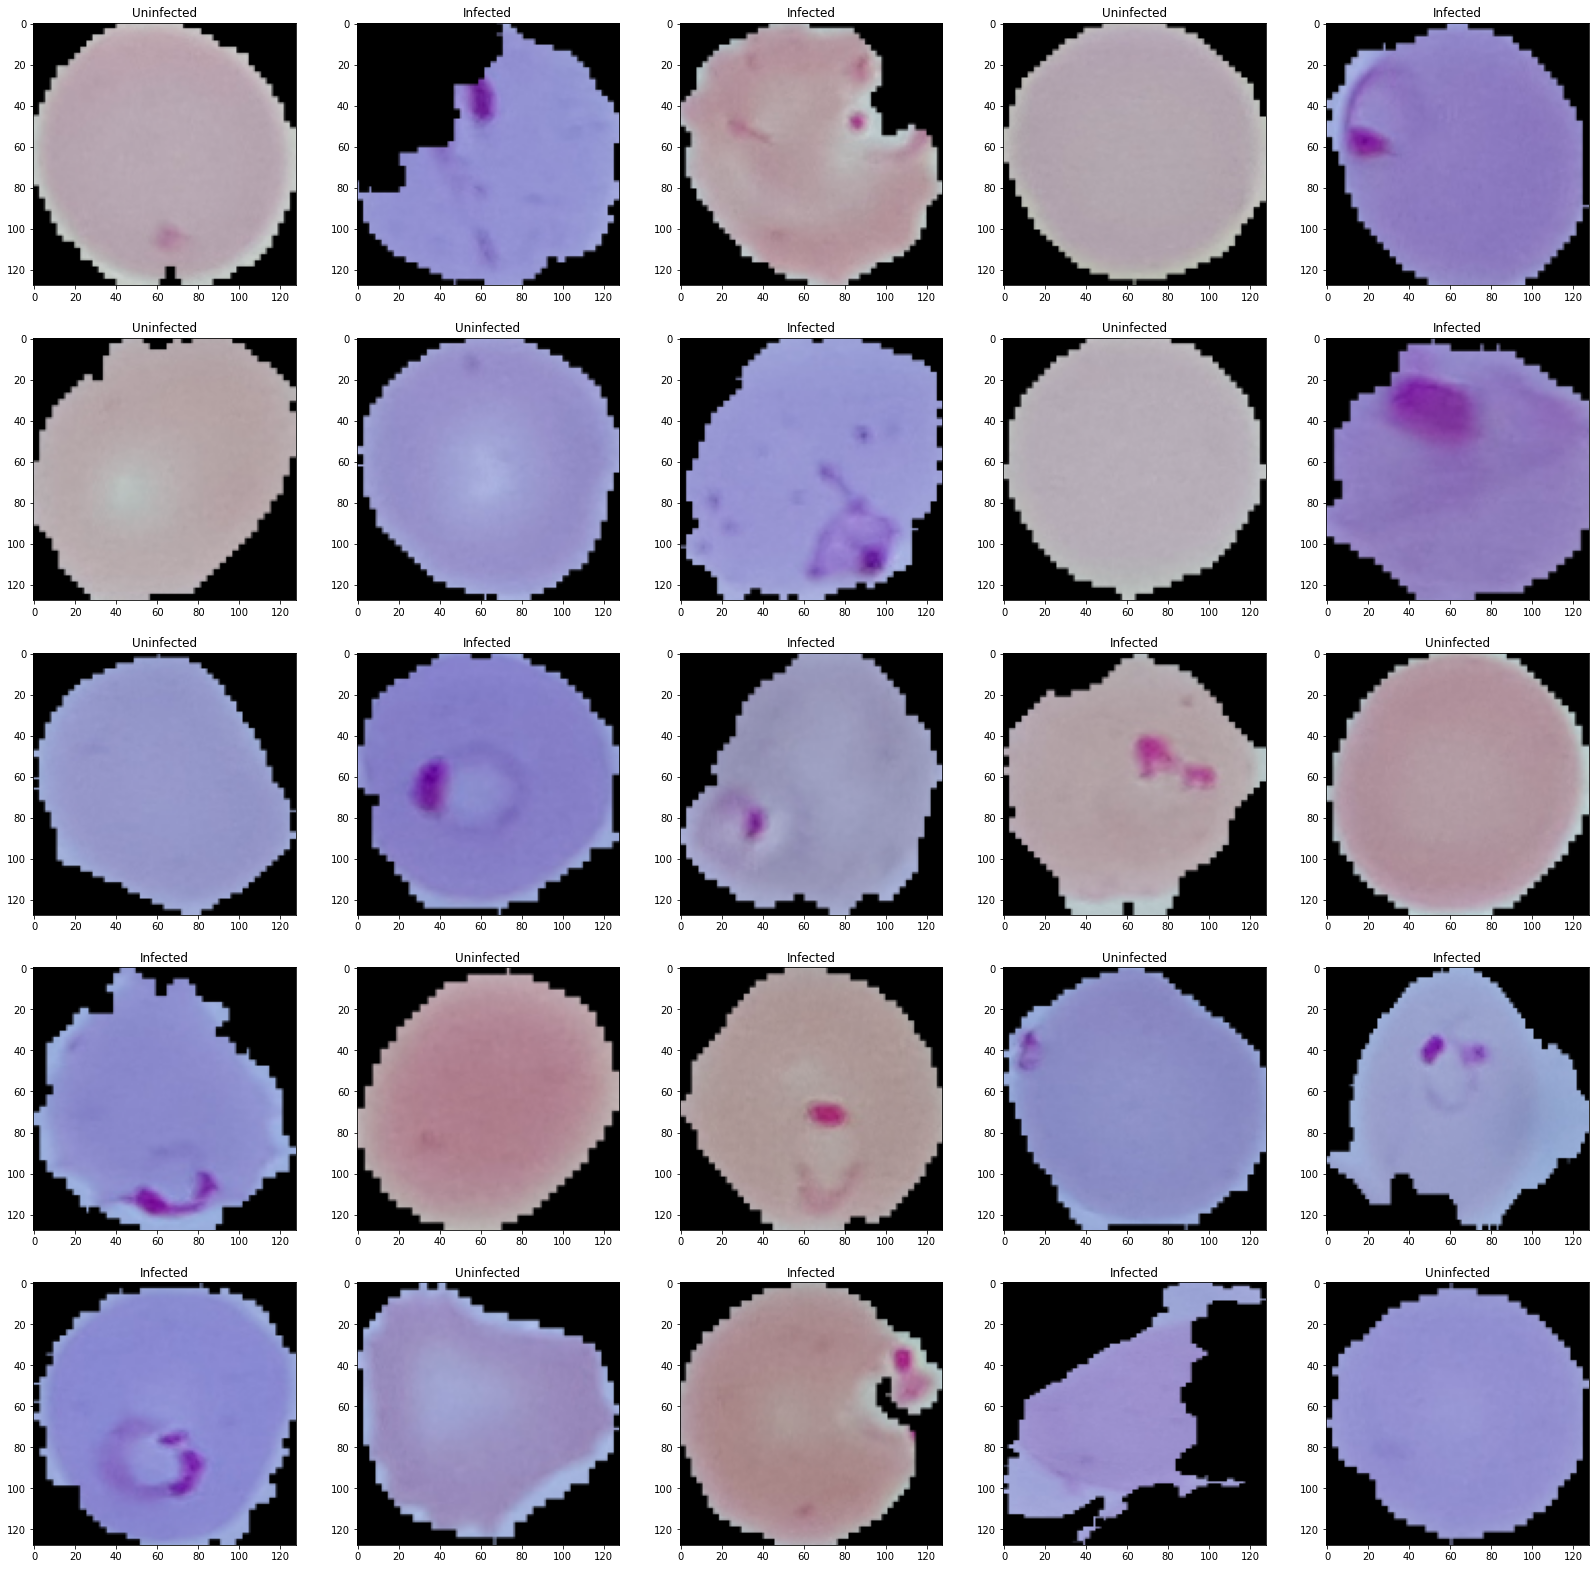

In [10]:
# Plotting Cell Images
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Uninfected')
    else:
        plt.title('Infected')
    
plt.show()

In [11]:
input_shape = (128, 128, 3)

# Creating Model
model = Sequential()

model.add(Conv2D(16, kernel_size=3, padding="same", input_shape=input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [12]:
hist = model.fit(X_train, y_train,
                shuffle=True,
                batch_size=512,
                 epochs=20,
                 validation_data=(X_test,y_test)
                )

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 3, 128, 128), kshp=(16, 3, 3, 3), filter_dilation=(1, 1), num_groups=1, unshared=False}(InplaceDimShuffle{0,3,1,2}.0, InplaceDimShuffle{3,2,0,1}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "c:\users\akash\appdata\local\programs\python\python37\lib\site-packages\theano\gof\opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "c:\users\akash\appdata\local\programs\python\python37\lib\site-packages\theano\tensor\nnet\opt.py", line 500, in local_abstractconv_check
    node.op.__class__.__name__)
theano.gof.opt.LocalMetaOptimizerSkipAssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_g

LocalMetaOptimizerSkipAssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against? On the CPU we do not support float16.

In [ ]:
print(hist.history.keys())

In [ ]:
def plot_loss():
    print(hist.history.keys())
    plt.figure()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    plt.figure()
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

In [ ]:
plot_loss()